In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv("preprocessed_lahore_house_prices.csv")
df.head()

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price,Area_Marlas
0,46326643,house,"dha defence, lahore, punjab",1 Kanal,6,5,75500000,20.0
1,46952582,house,"bahria orchard, lahore, punjab",8 Marla,5,5,25000000,8.0
2,47357581,house,"paragon city, lahore, punjab",10 Marla,6,5,47000000,10.0
3,47397157,flat,"askari, lahore, punjab",10 Marla,3,3,28000000,10.0
4,43109993,house,"dha defence, lahore, punjab",8 Marla,5,4,43500000,8.0


In [21]:
df.describe()

,house_id,Bath(s),Bedroom(s),Price,Area_Marlas
count,1.716300e+04,17163.000000,17163.000000,1.716300e+04,17163.000000
mean,4.655396e+07,4.716541,4.184175,4.758794e+07,11.623964
std,1.796235e+06,1.329520,1.294454,5.467740e+07,10.463044
min,6.872350e+05,1.000000,1.000000,1.150000e+05,1.000000
25%,4.652402e+07,4.000000,3.000000,1.800000e+07,5.000000
50%,4.706819e+07,5.000000,4.000000,3.200000e+07,10.000000
75%,4.731197e+07,6.000000,5.000000,6.000000e+07,20.000000
max,4.739719e+07,10.000000,11.000000,7.171000e+08,182.000000


In [22]:
df.describe(include='object')

,Type,Location,Area
count,17163,17163,17163
unique,2,21,169
top,house,"dha defence, lahore, punjab",5 Marla
freq,16017,4843,4302


## Dealing with univariate data

### House type distribution

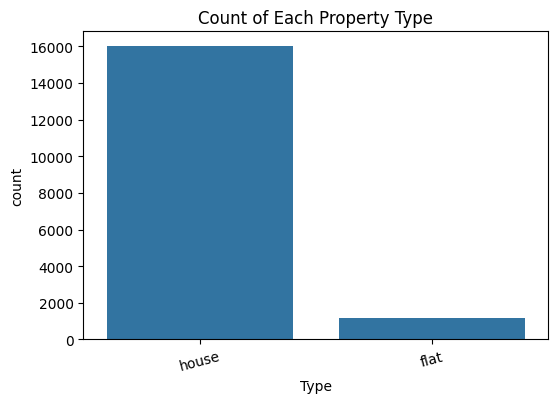

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Type")
plt.title("Count of Each Property Type")
plt.xticks(rotation=15)
plt.show()

### Location Frequency

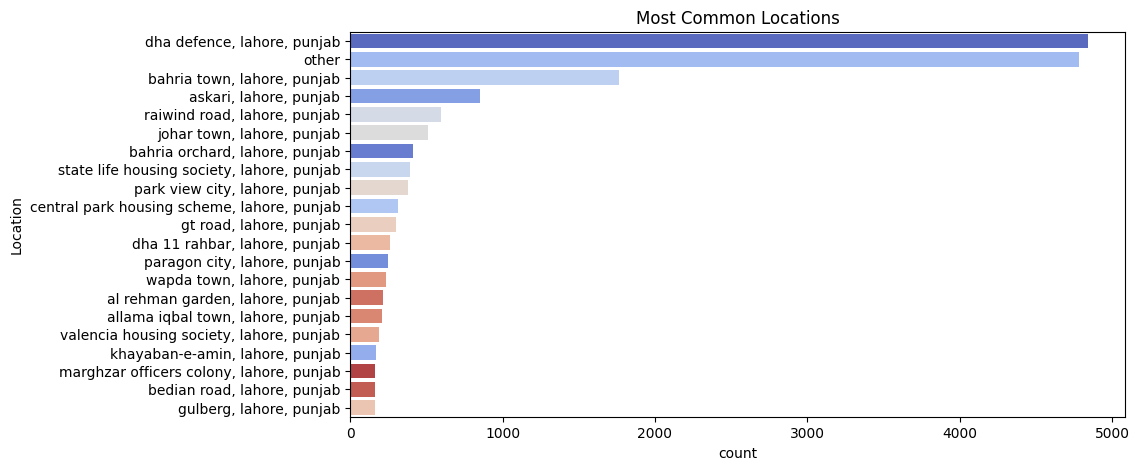

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Location", order=df["Location"].value_counts().index, hue="Location", palette="coolwarm", legend=False)
plt.title("Most Common Locations")
plt.show()

### Bathrooms and Bedrooms

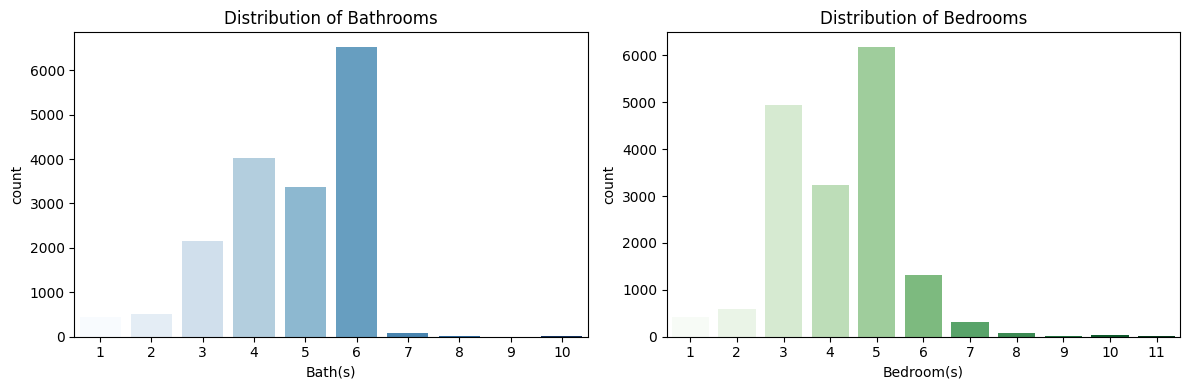

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) # two plots side-by-side
sns.countplot(data=df, x="Bath(s)", ax=axs[0], hue="Bath(s)", palette="Blues", legend=False)
sns.countplot(data=df, x="Bedroom(s)", ax=axs[1], hue="Bedroom(s)", palette="Greens", legend=False)
axs[0].set_title("Distribution of Bathrooms")
axs[1].set_title("Distribution of Bedrooms")
plt.tight_layout() # adds padding
plt.show()

### Total Area (Marla) Distribution

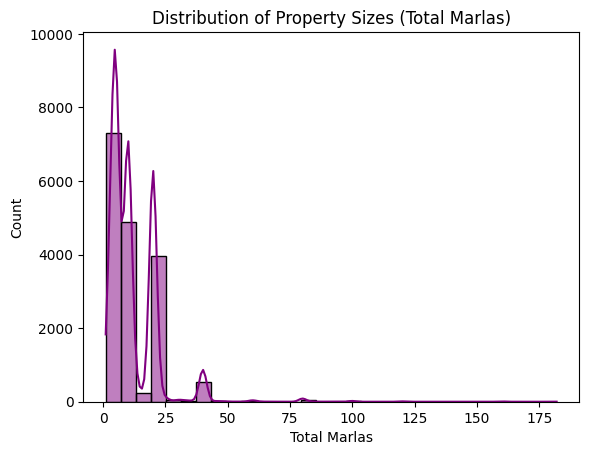

In [26]:
sns.histplot(df["Area_Marlas"], bins=30, kde=True, color='purple')
plt.title("Distribution of Property Sizes (Total Marlas)")
plt.xlabel("Total Marlas")
plt.show()

### Price Distribution
using log scale for better clarity due to wide range

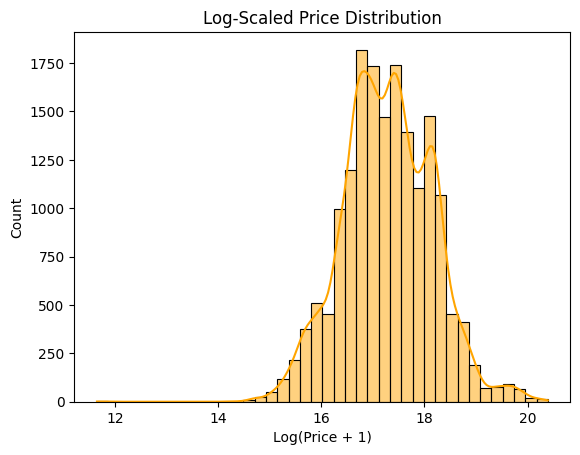

In [36]:
sns.histplot(np.log1p(df["Price"]), bins=40, kde=True, color='orange')
plt.title("Log-Scaled Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.show()

## Bivariate Analysis

### Price vs Area

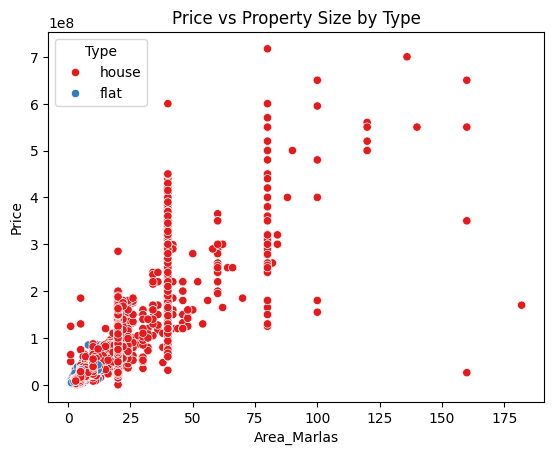

In [28]:
sns.scatterplot(data=df, x="Area_Marlas", y="Price", hue="Type", palette="Set1")
plt.title("Price vs Property Size by Type")
plt.show()

### Price vs Bedrooms/Bathrooms

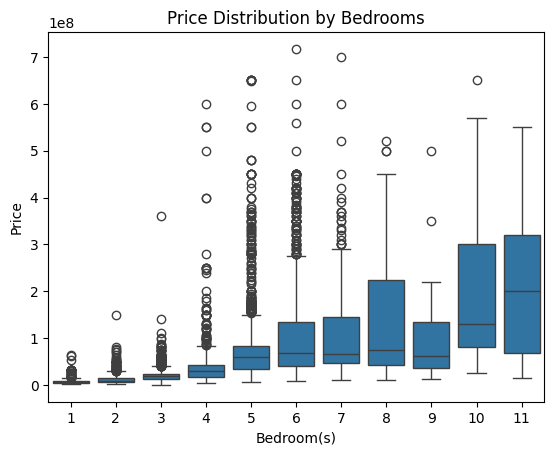

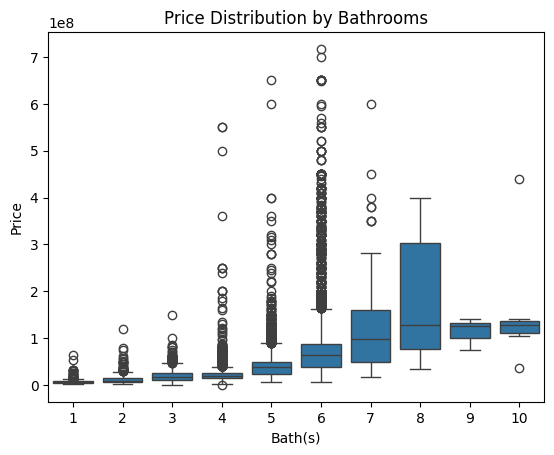

In [29]:
sns.boxplot(data=df, x="Bedroom(s)", y="Price")
plt.title("Price Distribution by Bedrooms")
plt.show()

sns.boxplot(data=df, x="Bath(s)", y="Price")
plt.title("Price Distribution by Bathrooms")
plt.show()

### Price by Type

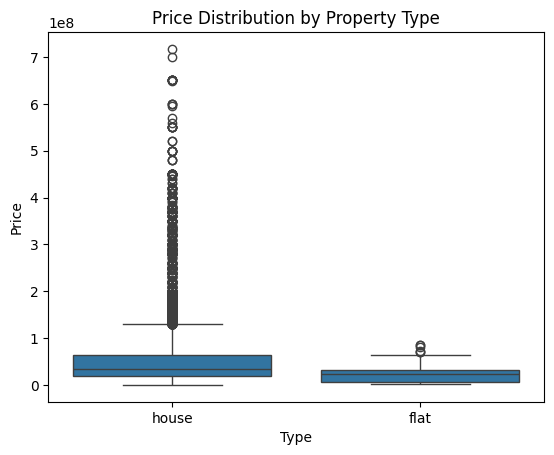

In [30]:
sns.boxplot(data=df, x="Type", y="Price")
plt.title("Price Distribution by Property Type")
plt.show()

## Location based analysis

### Average Price per Location (Top Locations Only)

C:\Users\nabee\AppData\Local\Temp\ipykernel_3676\2514935017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_avg.values, y=location_avg.index, palette="magma", legend=False)


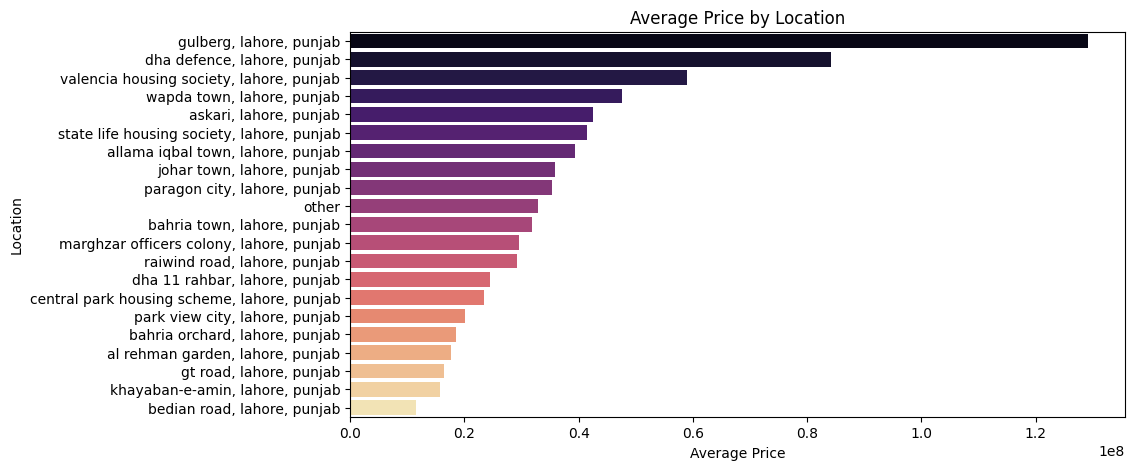

In [31]:
location_avg = df.groupby("Location")["Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=location_avg.values, y=location_avg.index, palette="magma", legend=False)
plt.title("Average Price by Location")
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.show()

### Top 5 Expensive & Cheapest Locations

In [32]:
print("Top 5 Expensive Locations:\n", location_avg.head())
print("\nTop 5 Cheapest Locations:\n", location_avg.tail())

Top 5 Expensive Locations:
 Location
gulberg, lahore, punjab                     1.292119e+08
dha defence, lahore, punjab                 8.425158e+07
valencia housing society, lahore, punjab    5.896561e+07
wapda town, lahore, punjab                  4.755256e+07
askari, lahore, punjab                      4.251256e+07
Name: Price, dtype: float64

Top 5 Cheapest Locations:
 Location
bahria orchard, lahore, punjab      1.859362e+07
al rehman garden, lahore, punjab    1.760607e+07
gt road, lahore, punjab             1.647819e+07
khayaban-e-amin, lahore, punjab     1.569068e+07
bedian road, lahore, punjab         1.146687e+07
Name: Price, dtype: float64


## Checking Price per Marla

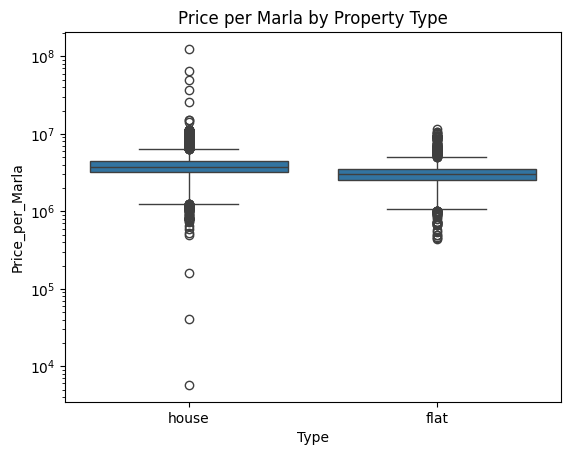

In [33]:
df["Price_per_Marla"] = df["Price"] / df["Area_Marlas"]

sns.boxplot(data=df, x="Type", y="Price_per_Marla")
plt.title("Price per Marla by Property Type")
plt.yscale("log")
plt.show()

## heatmap of Correlations

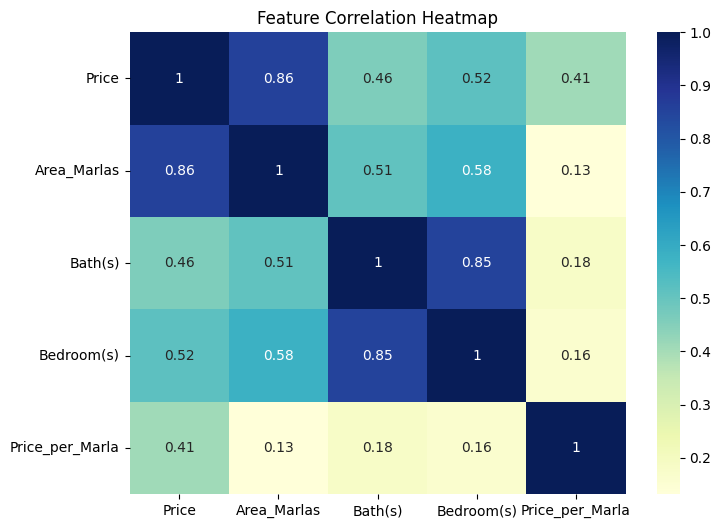

In [34]:
corr = df[["Price", "Area_Marlas", "Bath(s)", "Bedroom(s)", "Price_per_Marla"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()